In [1]:
%load_ext autoreload
%autoreload 2

from Eir import AgeStructuredSIR, AgeStructuredSIRD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../style.mplstyle")

In [3]:
days, dt = 31, 0.1

## AgeStructuredSIR

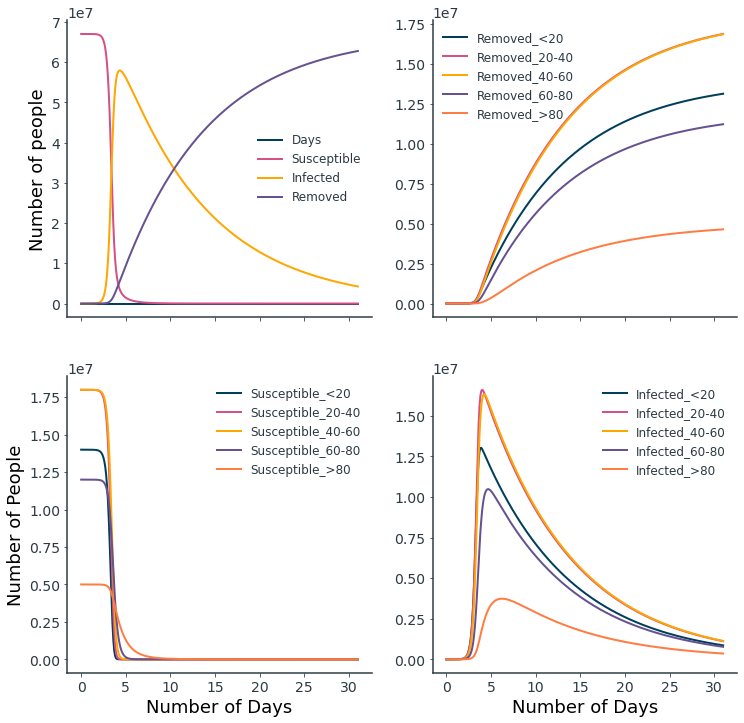

In [4]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
beta = [1.8, 1.4, 1.0, 0.6, 0.2]
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIR(labels, beta, gamma, S0, I0, R0)
df, fig = sim.run(days, dt)
fig

## AgeStructuredSIRD

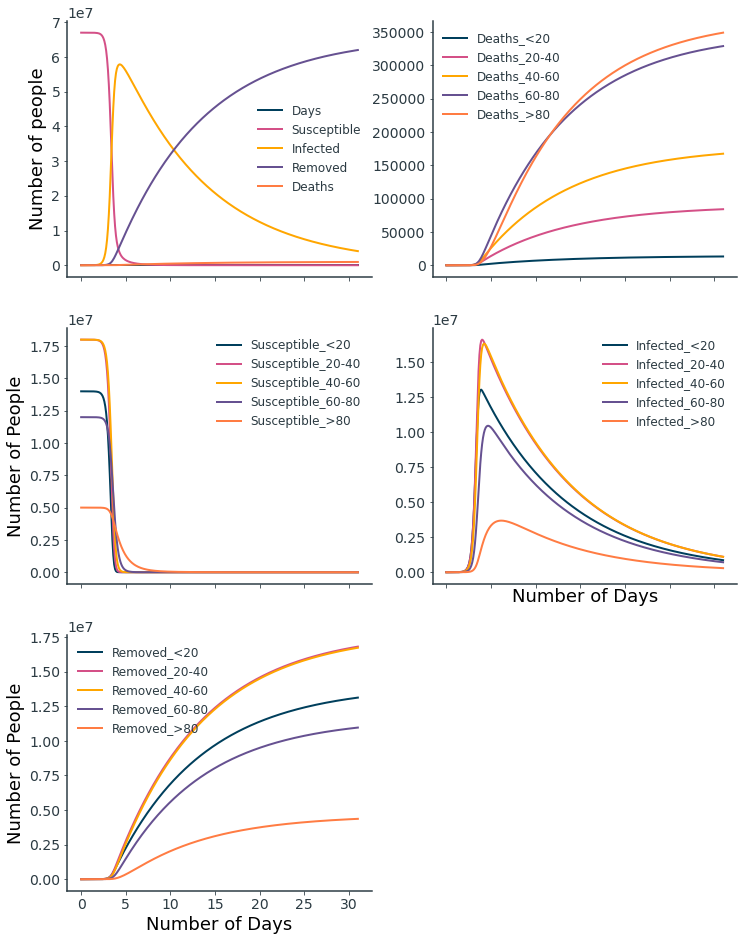

In [5]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
beta = [1.8, 1.4, 1.0, 0.6, 0.2]
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRD(labels, beta, gamma, omega, S0, I0, R0)
df, fig = sim.run(31, .1)
fig

In [6]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_sus = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(int)
fatality_rates = end_deaths[1:].values / (N - end_sus[1:]).values
for g, f in zip(end_deaths[1:].index, fatality_rates):
    print(f"{g:12}: {f*100:.2f}%")

Deaths_<20  : 0.09%
Deaths_20-40: 0.47%
Deaths_40-60: 0.93%
Deaths_60-80: 2.74%
Deaths_>80  : 6.98%
